In [1]:
import pandas as pd

# Creating tables

In [2]:
# OLD
data = pd.read_csv('../data/count_per_lang_wfullang.csv').drop('language_code', 1)
data.columns = "Language,Entity type,N".split(',')
data.head()

,Language,Entity type,N
0,Afrikaans,LOC,89861
1,Afrikaans,ORG,56630
2,Afrikaans,PER,210648
3,Northern Sotho,LOC,3195
4,Northern Sotho,ORG,1263


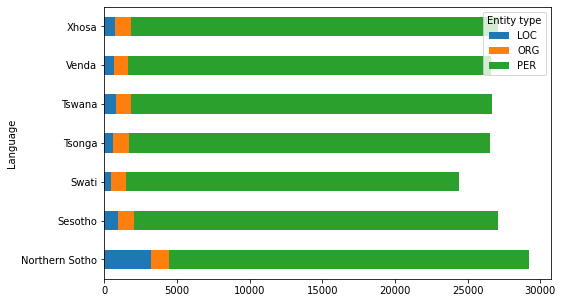

In [3]:
(data[~data.Language.isin(["Zulu", "Afrikaans"])]
     .pivot(index='Language',
           columns="Entity type", 
           values='N')
     .plot(kind='barh', figsize=(8,5), stacked=True))

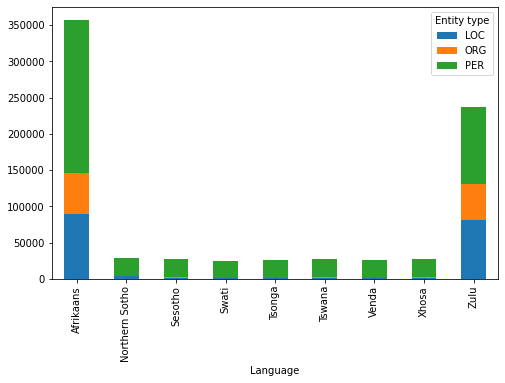

In [4]:
(data.pivot(index='Language',
           columns="Entity type", 
           values='N')
     .plot(kind='bar', figsize=(8,5), stacked=True))

#### New

In [5]:
import orjson

In [6]:
with open("../data/all-african-languages.json", 'r') as f:
    lang_to_abbrev = orjson.loads(f.read())
    abbrev_to_lang = {v: k for k,v in lang_to_abbrev.items()}

In [7]:
dump = pd.concat([pd.read_csv(f"/data-drive/datasets/african-languages-dump-020521/{conll_type}.csv") for conll_type in ["PER", "LOC", "ORG"]])

In [8]:
dump['full_language'] = dump.language.apply(lambda l: abbrev_to_lang[l]) 

### Lang -> abbreviation table

In [9]:
abbrev_to_lang_table = pd.DataFrame.from_records(list(abbrev_to_lang.items()), columns="Language code,Language".split(","))[["Language", "Language code"]]

In [10]:
# to latex
print(abbrev_to_lang_table.to_latex(index=False))

\begin{tabular}{ll}
\toprule
            Language & Language code \\
\midrule
                Afar &            aa \\
           Afrikaans &            af \\
                Akan &            ak \\
             Amharic &            am \\
               Chewa &            ny \\
               Hausa &            ha \\
                Igbo &            ig \\
         Kinyarwanda &            rw \\
             Kirundi &            rn \\
               Kongo &            kg \\
             Lingala &            ln \\
             Luganda &            lg \\
            Malagasy &            mg \\
      Northern Sotho &           nso \\
               Oromo &            om \\
               Shona &            sn \\
              Somali &            so \\
             Swahili &            sw \\
            Tigrinya &            ti \\
              Tsonga &            ts \\
              Tswana &            tn \\
               Venda &            ve \\
               Wolof &            wo \\
  

### Types per language table

In [11]:
dump_per_lang = dump[['id', 'name','alias', 'language', 'full_language', 'type']].copy()
dump_per_lang.columns = ['ID', 'Name', "Alias", "Language code", "Language", "Entity type"]

In [12]:
types_per_language = dump_per_lang.groupby(["Language", "Entity type"]).ID.count().unstack().copy()

In [13]:
types_per_language['Total'] = types_per_language.sum(axis=1)

In [14]:
types_per_language

Entity type,LOC,ORG,PER,Total
Language,,,,
Afar,424,964,25922,27310
Afrikaans,89861,56630,210648,357139
Akan,1389,1430,26551,29370
Amharic,1958,1173,1933,5064
Cape Verdean Creole,62,120,355,537
Chewa,1924,937,24818,27679
Hausa,3403,1549,31588,36540
Igbo,880,1355,27131,29366
Kinyarwanda,2293,1311,24992,28596


In [15]:
# as latex
# print(types_per_language.to_latex(index=True, bold_rows=False))

### Types per language bar chart

In [16]:
import seaborn as sns

Text(0.5, 0, '')

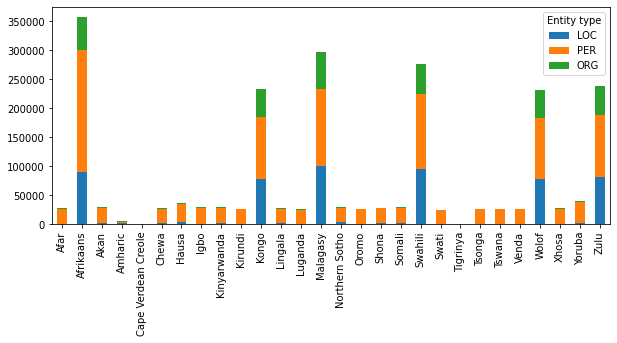

In [17]:
ax = types_per_language[['LOC','PER','ORG']].plot(kind='bar',stacked=True, figsize=(10, 4))
ax.set_xlabel("")

### Similarity to English

In [18]:
import wikidata_helpers as wh

In [19]:
dump_english_similarity = wh.compute_english_dissimilarity_df(dump.copy()) 

In [20]:
dump_english_similarity['full_language'] = dump_english_similarity.language.apply(lambda l: abbrev_to_lang[l])

### Languages with Wikis

In [21]:
langs_with_wikis = set(["Abkhaz","Acehnese","Adyghe","Afar","Afrikaans","Akan","Albanian","Alemannic","Amharic","Arabic","Aragonese","Aramaic","Armenian","Aromanian","Assamese","Asturian","Atikamekw","Avar","Awadhi","Aymara","Azerbaijani","Balinese","Bambara","Banjar","Banyumasan","Bashkir","Basque","Bavarian","Belarusian","Belarusian (Taraškievica)","Bengali","Bihari (Bhojpuri)","Bishnupriya Manipuri","Bislama","Bosnian","Breton","Buginese","Bulgarian","Burmese","Buryat","Cantonese","Catalan","Cebuano","Central Bikol","Chamorro","Chechen","Cherokee","Chewa","Cheyenne","Chinese(written vernacular Chinese,a form of Mandarin Chinese)","Choctaw","Chuvash","Classical Chinese","Cornish","Corsican","Cree","Crimean Tatar","Croatian","Czech","Danish","Dhivehi","Dinka","Doteli","Dutch","Dutch Low Saxon","Dzongkha","Eastern Min/Min Dong","Eastern Punjabi","Egyptian Arabic","Emilian-Romagnol","English","Erzya","Esperanto","Estonian","Ewe","Extremaduran","Faroese","Fiji Hindi","Fijian","Finnish","Franco-Provençal/Arpitan","French","Friulian","Fula","Gagauz","Galician","Gan Chinese","Georgian","German","Gilaki","Gorontalo","Gothic","Greek","Greenlandic","Guarani","Guianan Creole","Gujarati","Haitian Creole","Hakka","Hausa","Hawaiian","Hebrew","Herero","Hill Mari","Hindi","Hiri Motu","Hungarian","Icelandic","Ido","Igbo","Ilokano","Inari Sami","Indonesian","Ingush","Interlingua","Interlingue","Inuktitut","Inupiaq","Irish","Italian","Jamaican Patois","Japanese","Javanese","Judaeo-Spanish/Ladino","Kabardian","Kabiye","Kabyle","Kalmyk","Kannada","Kanuri","Kapampangan","Karachay-Balkar","Karakalpak","Kashmiri","Kashubian","Kazakh","Khmer","Kikuyu","Kinyarwanda","Kirundi","Komi","Komi-Permyak","Kongo","Konkani","Korean","Kotava","Kuanyama","Kurdish (Kurmanji)","Kurdish (Sorani)","Kyrgyz","Ladin","Lak","Lao","Latgalian","Latin","Latvian","Lezgian","Ligurian","Limburgish","Lingala","Lingua Franca Nova","Lithuanian","Livvi-Karelian","Lojban","Lombard","Low German","Lower Sorbian","Luganda","Luxembourgish","Macedonian","Madurese","Maithili","Malagasy","Malay","Malayalam","Maltese","Manx","Marathi","Marshallese","Mazanderani","Meadow Mari","Minangkabau","Mingrelian","Mirandese","Moksha","Moldovan","Mon","Mongolian","Moroccan Arabic","Muscogee","Māori","N'Ko","Nahuatl","Nauruan","Navajo","Ndonga","Neapolitan","Nepali","Newar/Nepal Bhasa","Nias","Norfolk","Norman","North Frisian","Northern Luri","Northern Sami","Northern Sotho","Norwegian (Bokmål)","Norwegian (Nynorsk)","Novial","Nuosu/Sichuan Yi","Occitan","Odia","Old Church Slavonic","Old English/Anglo-Saxon","Oromo","Ossetian","Palatine German","Pali","Pangasinan","Papiamento","Pashto","Pennsylvania German","Persian","Picard","Piedmontese","Polish","Pontic Greek","Portuguese","Quechua","Ripuarian","Romanian","Romansh","Russian","Rusyn","Sakizaya","Samoan","Samogitian","Sango","Sanskrit","Santali","Saraiki","Sardinian","Saterland Frisian","Scots","Scottish Gaelic","Serbian","Serbo-Croatian","Shan","Shona","Sicilian","Silesian","Simple English","Sindhi","Sinhalese","Slovak","Slovene","Somali","Sotho","South Azerbaijani","Southern Min/Min Nan","Spanish","Sranan Tongo","Sundanese","Swahili","Swazi","Swedish","Tagalog","Tahitian","Tajik","Tamil","Tarantino","Tatar","Telugu","Tetum","Thai","Tibetan","Tigrinya","Tok Pisin","Tongan","Tsonga","Tswana","Tulu","Tumbuka","Turkish","Turkmen","Tuvan","Twi","Udmurt","Ukrainian","Upper Sorbian","Urdu","Uyghur","Uzbek","Venda","Venetian","Veps","Vietnamese","Vlax Romani","Volapük","Võro","Walloon","Waray","Welsh","West Flemish","West Frisian","Western Armenian","Western Punjabi","Wolof","Wu","Xhosa","Yakut/Sakha","Yiddish","Yoruba","Zamboanga Chavacano","Zazaki","Zeelandic","Zhuang","Zulu"])

### Join to big table

In [22]:
join_to_big_table = dump_english_similarity[['full_language', 'english_similarity']].copy()

In [23]:
join_to_big_table.columns = ['Language', 'English overlap (%)']

In [24]:
big_table = pd.merge(types_per_language, join_to_big_table, on="Language")
big_table['Language code'] = big_table.Language.apply(lambda l: lang_to_abbrev[l])

In [25]:
big_table['English overlap (%)']  = 100*big_table['English overlap (%)'].round(3)

In [42]:
big_table['Has Wikipedia'] = big_table['Language'].apply(lambda l: "True" if l in langs_with_wikis else "")

In [43]:
big_table = big_table[['Language', 'Language code','Has Wikipedia', 'LOC', 'ORG', 'PER', 'Total', 'English overlap (%)']]

In [45]:
pd.DataFrame.to_latex?

In [49]:
def add_thousands_comma(value):
    return f'{value:,}'

In [126]:
big_table_lang_index = big_table.set_index("Language")

In [139]:
big_table_lang_index.loc['Average'] = big_table_lang_index.mean(axis=0).round()
big_table_lang_index.loc['Median'] = big_table_lang_index.median(axis=0).round()

In [140]:
print(big_table_lang_index.to_latex(index=True, formatters={"PER": add_thousands_comma, "LOC": add_thousands_comma, "ORG": add_thousands_comma, "Total": add_thousands_comma}))

\begin{tabular}{lllrrrrr}
\toprule
{} & Language code & Has Wikipedia &       LOC &      ORG &       PER &     Total &  English overlap (\%) \\
Language            &               &               &           &          &           &           &                      \\
\midrule
Afar                &            aa &          True &     424.0 &    964.0 &  25,922.0 &  27,310.0 &                 98.6 \\
Afrikaans           &            af &          True &  89,861.0 & 56,630.0 & 210,648.0 & 357,139.0 &                 92.6 \\
Akan                &            ak &          True &   1,389.0 &  1,430.0 &  26,551.0 &  29,370.0 &                 97.5 \\
Amharic             &            am &          True &   1,958.0 &  1,173.0 &   1,933.0 &   5,064.0 &                  4.6 \\
Cape Verdean Creole &           kea &               &      62.0 &    120.0 &     355.0 &     537.0 &                 82.5 \\
Chewa               &            ny &          True &   1,924.0 &    937.0 &  24,818.0 &  27,679.

In [29]:
empty_langs = list(set(abbrev_to_lang_table['Language code'].unique()) - set(big_table['Language code'].unique()))

In [30]:
empty_full_langs = [abbrev_to_lang[a] for a in empty_langs]

In [142]:
wh.compute_english_dissimilarity_df??

### most diverse language

In [69]:
def n_unique_aliases(df):
    return len(set(df.alias))

In [85]:
dump.groupby('id').apply(n_unique_aliases).sort_values(ascending=False).head(10)

id
Q30      24
Q142     22
Q258     22
Q183     21
Q1859    20
Q43      19
Q148     18
Q46      18
Q29      18
Q971     18
dtype: int64

In [94]:
african_union = dump[dump.id == "Q7159"]

In [98]:
african_union[african_union.language.isin(['zu', 'am'])].head(2)[['name','alias', 'full_language']]

,name,alias,full_language
441555,African Union,Iqoqo i-Afrika,Zulu
441557,African Union,የአፍሪቃ ህብረት,Amharic


In [122]:
def create_comparison_table(dump, wikidata_id, langs):
    subset = dump[dump.id == wikidata_id]
    subset = subset[subset.language.isin(langs)].head(len(langs))[['name','alias', 'full_language']].copy()
    subset_dict = subset.set_index('full_language').to_dict('index')
    out = pd.DataFrame()
    out['English'] = [subset.name.tolist()[0]]
    for lang in subset_dict:
        out[lang] = [subset_dict[lang]['alias']]
    return out

In [123]:
african_union_comparison = create_comparison_table(dump, "Q7159", "zu,am".split(","))

In [125]:
print(african_union_comparison.to_latex(index=False))

\begin{tabular}{lll}
\toprule
       English &            Zulu &     Amharic \\
\midrule
 African Union &  Iqoqo i-Afrika &  የአፍሪቃ ህብረት \\
\bottomrule
\end{tabular}



In [91]:
# america[['alias', 'full_language']]#.set_index('full_language').unstack()

### amharic

In [54]:
amharic = dump[dump.language == 'am'].copy()

In [55]:
((amharic.name != amharic.alias)|(amharic.name==amharic.id)).mean()

0.9543838862559242

In [58]:
amharic.sample(50)

,id,name,alias,language,type,full_language
497790,Q151148,Chola dynasty,የቾላ ሥርወ መንግሥት,am,LOC,Amharic
497757,Q13143690,Q13143690,ሞያሌ፣ ኦሮሚያ(ወረዳ),am,LOC,Amharic
467263,Q104452144,Claudia Marietta,Claudia Marietta,am,PER,Amharic
627261,Q191719,Zooey Deschanel,ዞዊ ዴሸኔል,am,PER,Amharic
325532,Q809658,Le Nain Brothers,ለ ኔን ወንድሞች,am,ORG,Amharic
1227404,Q20607139,Tamrat Molla,ታምራት ሞላ,am,PER,Amharic
1227458,Q536201,Eriba-Adad II,2 ኤሪባ-አዳድ,am,PER,Amharic
497520,Q20629906,Q20629906,ዶዶታና ሲሬ,am,LOC,Amharic
141886,Q35775,Boise,ቦይዚ,am,ORG,Amharic
102219,Q956,Beijing,ቤዪጂንግ,am,ORG,Amharic


### total number of languages in dump

In [144]:
dump.id.unique().shape

(413516,)

In [145]:
dump.alias.unique().shape

(414659,)

In [147]:
dump.language.unique().shape

(28,)

In [151]:
dump.groupby('id').alias.count().value_counts(bins=10)

(0.944, 6.5]    341067
(6.5, 12.0]      45677
(23.0, 28.5]     23404
(17.5, 23.0]      2699
(12.0, 17.5]       444
(39.5, 45.0]        71
(45.0, 50.5]        59
(28.5, 34.0]        45
(34.0, 39.5]        38
(50.5, 56.0]        12
Name: alias, dtype: int64

In [152]:
dump.shape

(2181831, 6)

In [154]:
big_table.Total.sum()

2181831